# 1. Batch normalization (2 points)

Please make use of the model code from Homework 5 question 2 as you work on this question.

1. If your model didn't use batch normalization, add it. If it already had batch normalization, remove it. How does the performance change? Please experiment with different learning rate values, since batch normalization can allow a different range of learning rates to work. You are welcome to write your own batch norm implementaiton or use a pre-existing one from mxnet or pytorch.
1. Plot the squared L2 norm of gradients with respect to parameters over the course of training with and without batch normalization. To do this, you will need to compute the gradient of the loss over some data with respect to each parameter, square these gradients, and sum the result across all parameters. You can compute this value at each training step, or after each epoch. What difference does batch normalization make in terms of the squared L2 norm of gradients?

**Conclusion:**

I practiced the performance of 3 learning rates with or without batch normalization, and the results are as follows:

![lr_result](https://github.com/ZhaohuiWang-github/COMP664-deep-learning/raw/main/hw6_figure_1and2/lr_results.png) 

We can find that:
- The accuracy of the model with batch normalization is generally higher than that without batch normalization.
- The training time for models that use batch normalization tends to be longer than for models that do not use batch normalization.
- The learning rate affects the accuracy of the model. Setting the learning rate too large or too small may cause the accuracy of the model to decrease. When the learning rate is not set properly, it may even cause the model accuracy to crash.
- When setting different maximum learning rates, the training time of the model is similar. This may be related to our use of the learning rate scheduler.

**Conclusion:**

I set the maximum learning rate to 0.001 and compare square L2 norm of gradients, loss and accuracy with and without batch. The results are as follows:

![l2 norm](https://github.com/ZhaohuiWang-github/COMP664-deep-learning/raw/main/hw6_figure_1and2/lr0.001BN.png) ![l2 norm](https://github.com/ZhaohuiWang-github/COMP664-deep-learning/raw/main/hw6_figure_1and2/lr0.001noBN.png)

![loss](https://github.com/ZhaohuiWang-github/COMP664-deep-learning/raw/main/hw6_figure_1and2/lr0.001BN_loss.png) ![loss](https://github.com/ZhaohuiWang-github/COMP664-deep-learning/raw/main/hw6_figure_1and2/lr0.001noBN_loss.png)

![acc](https://github.com/ZhaohuiWang-github/COMP664-deep-learning/raw/main/hw6_figure_1and2/lr0.001BN_acc.png) ![acc](https://github.com/ZhaohuiWang-github/COMP664-deep-learning/raw/main/hw6_figure_1and2/lr0.001noBN_acc.png)

We can find that:

- In the first few epochs, relatively speaking, the squared L2 norm of gradients decreases more steadily when batch normalization is used. However, since I used the learning rate scheduler, the model without batch normalization also quickly became very stable in decreasing. In later epochs, the squared L2 norm of gradients of our models has a good downward trend whether batch normalization is used or not.

- Theoretically, batch normalization reduces the variance of the inputs, which in turn reduces the variance of the gradients. This can help to prevent the gradients from becoming too large, which can lead to instability and slow convergence. Intuitively, batch normalization is thought to make the optimization landscape smoother. However, it is not obvious from our curves, because I used the learning rate scheduler.


# 2. Residual connections (2 points)

Please make use of the model code from Homework 5 question 2 as you work on this question.

If your model didn't use residual connections, add them. If it already had residual connections, remove them. How does the performance change? Please experiment with applying residual connections around different blocks, where a block is a subset of layers (for example, add a residual connection around a single convolution/nonlinearity combination, or a residual connection around two convolution/nonlinearity combinations). Note that you may need to add 1x1 convolutions in the residual path if your block changes the shape (spatial or number of channels) of the input.

**Conclusion：**

According to the requirements, I practiced 3 types of models:
- Model 1: do not use residual connections
- Model 2: add a residual connection around two convolution/nonlinearity combinations
- Model 3: add a residual connection around a single convolution/nonlinearity combination

The results of running these three models are as follows:
![model_result](https://github.com/ZhaohuiWang-github/COMP664-deep-learning/raw/main/hw6_figure_1and2/model_results.png)

We can find that:
- The accuracy of the models with the residual connections is significantly better than that of the model without the residual connections.
- With all three models iterating 20 epochs, the more residual connections are used, the higher the accuracy of the model. This is because the residual connections allow the network to learn more complex representations and can help to avoid the problem of vanishing gradients.
- As more residual connections are added, the complexity of the model is higher and so the training time is longer.

The detailed structure of these 3 models is shown below:

In [ ]:
# Model 1
# Don't use residual connections
# Time cost: 9min40s
# Accuracy: 90.99%

"""
ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv4): Sequential(
    (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
    (1): Flatten(start_dim=1, end_dim=-1)
    (2): Linear(in_features=512, out_features=10, bias=True)
  )
)
"""

'\nResNet9(\n  (conv1): Sequential(\n    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))\n    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)\n    (2): ReLU(inplace=True)\n  )\n  (conv2): Sequential(\n    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))\n    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)\n    (2): ReLU(inplace=True)\n    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)\n  )\n  (conv3): Sequential(\n    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))\n    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)\n    (2): ReLU(inplace=True)\n    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)\n  )\n  (conv4): Sequential(\n    (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))\n    (1): BatchNorm2d(512, eps=1e-05, mo

In [ ]:
# Model 2
# Add a residual connection around two convolution/nonlinearity combinations
# Time cost: 10min48s
# Accuracy: 92.94%

"""
ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
  )
  (conv3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv4): Sequential(
    (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res2): Sequential(
    (0): Sequential(
      (0): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
  )
  (classifier): Sequential(
    (0): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
    (1): Flatten(start_dim=1, end_dim=-1)
    (2): Linear(in_features=512, out_features=10, bias=True)
  )
)
"""

'\nResNet9(\n  (conv1): Sequential(\n    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))\n    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)\n    (2): ReLU(inplace=True)\n  )\n  (conv2): Sequential(\n    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))\n    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)\n    (2): ReLU(inplace=True)\n    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)\n  )\n  (res1): Sequential(\n    (0): Sequential(\n      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))\n      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)\n      (2): ReLU(inplace=True)\n    )\n    (1): Sequential(\n      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))\n      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)\n  

In [ ]:
# Model 3
# Add a residual connection around a single convolution/nonlinearity combination
# Time cost: 13min44s
# Accuracy: 93.54%

"""
ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res2): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
  )
  (conv3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res3): Sequential(
    (0): Sequential(
      (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
  )
  (conv4): Sequential(
    (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res4): Sequential(
    (0): Sequential(
      (0): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
  )
  (classifier): Sequential(
    (0): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
    (1): Flatten(start_dim=1, end_dim=-1)
    (2): Linear(in_features=512, out_features=10, bias=True)
  )
)
"""

'\nResNet9(\n  (conv1): Sequential(\n    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))\n    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)\n    (2): ReLU(inplace=True)\n  )\n  (res1): Sequential(\n    (0): Sequential(\n      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))\n      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)\n      (2): ReLU(inplace=True)\n    )\n    (1): Sequential(\n      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))\n      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)\n      (2): ReLU(inplace=True)\n    )\n  )\n  (conv2): Sequential(\n    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))\n    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)\n    (2): ReLU(inplace=True)\n    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, 

## Code Part

In [ ]:
import os
import torch
import torchvision
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.transforms as tt
import matplotlib.pyplot as plt

### Perpare Dataset

In [ ]:
# Data transforms (normalization & data augmentation)
stats = ((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
train_tfms = tt.Compose([tt.RandomCrop(32, padding=4, padding_mode='reflect'), 
                         tt.RandomHorizontalFlip(), 
                         tt.ToTensor(), 
                         tt.Normalize(*stats,inplace=True)])
valid_tfms = tt.Compose([tt.ToTensor(), tt.Normalize(*stats)])

In [ ]:
# CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='../../data/',
                                             train=True, 
                                             transform=train_tfms,
                                             download=True)

valid_dataset = torchvision.datasets.CIFAR10(root='../../data/',
                                            train=False, 
                                            transform=valid_tfms)

Files already downloaded and verified


In [ ]:
batch_size = 512

# PyTorch data loaders
train_dl = DataLoader(train_dataset, batch_size, shuffle=True, num_workers=3, pin_memory=True)
valid_dl = DataLoader(valid_dataset, batch_size*2, num_workers=3, pin_memory=True)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


### Use a GPU

In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

In [ ]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

In [ ]:
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
device = get_default_device()
device

device(type='cuda')

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

### Resnet

In [ ]:
def accuracy(outputs, labels):
    """Calculate accuracy"""
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [ ]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))

In [ ]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels),  # batch normalization
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

In [ ]:
# ResNet9
# Add a residual connection around two convolution/nonlinearity combinations
class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = conv_block(in_channels, 64)
        self.conv2 = conv_block(64, 128, pool=True)
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128))
        
        self.conv3 = conv_block(128, 256, pool=True)
        self.conv4 = conv_block(256, 512, pool=True)
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))
        
        self.classifier = nn.Sequential(nn.MaxPool2d(4), 
                                        nn.Flatten(), 
                                        nn.Linear(512, num_classes))
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out

model = to_device(ResNet9(3, 10), device)
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

In [ ]:
# # Don't use residual connections

# class ResNet9(ImageClassificationBase):
#     def __init__(self, in_channels, num_classes):
#         super().__init__()
        
#         self.conv1 = conv_block(in_channels, 64)
#         self.conv2 = conv_block(64, 128, pool=True)
#         # self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128))
        
#         self.conv3 = conv_block(128, 256, pool=True)
#         self.conv4 = conv_block(256, 512, pool=True)
#         # self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))
        
#         self.classifier = nn.Sequential(nn.MaxPool2d(4), 
#                                         nn.Flatten(), 
#                                         nn.Linear(512, num_classes))
        
#     def forward(self, xb):
#         out = self.conv1(xb)
#         out = self.conv2(out)
#         # out = self.res1(out) + out
#         out = self.conv3(out)
#         out = self.conv4(out)
#         # out = self.res2(out) + out
#         out = self.classifier(out)
#         return out

# model = to_device(ResNet9(3, 10), device)
# model

In [ ]:
# # Add a residual connection around a single convolution/nonlinearity combination

# class ResNet9(ImageClassificationBase):
#     def __init__(self, in_channels, num_classes):
#         super().__init__()
        
#         self.conv1 = conv_block(in_channels, 64)
#         self.res1 = nn.Sequential(conv_block(64, 64), conv_block(64, 64))
#         self.conv2 = conv_block(64, 128, pool=True)
#         self.res2 = nn.Sequential(conv_block(128, 128), conv_block(128, 128))
        
#         self.conv3 = conv_block(128, 256, pool=True)
#         self.res3 = nn.Sequential(conv_block(256, 256), conv_block(256, 256))
#         self.conv4 = conv_block(256, 512, pool=True)
#         self.res4 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))
        
#         self.classifier = nn.Sequential(nn.MaxPool2d(4), 
#                                         nn.Flatten(), 
#                                         nn.Linear(512, num_classes))
        
#     def forward(self, xb):
#         out = self.conv1(xb)
#         out = self.res1(out) + out
#         out = self.conv2(out)
#         out = self.res2(out) + out
#         out = self.conv3(out)
#         out = self.res3(out) + out
#         out = self.conv4(out)
#         out = self.res4(out) + out
#         out = self.classifier(out)
#         return out

# model = to_device(ResNet9(3, 10), device)
# model

### Train the model

In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
    """evaluation"""
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)


def get_lr(optimizer):
    """Learning rate scheduling"""
    for param_group in optimizer.param_groups:
        return param_group['lr']

In [ ]:
def l2_norm_func(model):
    total_norm = 0
    parameters = [p for p in model.parameters() if p.grad is not None and p.requires_grad]
    for p in parameters:
        param_norm = p.grad.detach().data.norm(2)
        total_norm += param_norm.item() ** 2
    
    # total_norm = total_norm ** 0.5
    return total_norm

In [ ]:
def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    """incorporate learning rate scheduling, weight decay, gradient clipping"""
    torch.cuda.empty_cache()
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    l2_norm_results = []
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []

        l2_norm_temp = 0

        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
         
            # Compute the squared L2 norm of gradients with respect to parameters
            l2_norm_temp += l2_norm_func(model)

            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()

        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)

        # Compute the squared L2 norm of gradients with respect to parameters
        # Use the average of all batches
        l2_norm_results.append(l2_norm_temp / len(train_loader))
        print(l2_norm_temp / len(train_loader))
        # Use the sum of all batches
        # l2_norm_results.append(l2_norm_temp)
        # print(l2_norm_temp)

    return history, l2_norm_results

In [ ]:
history = [evaluate(model, valid_dl)]
history

[{'val_loss': 2.3043532371520996, 'val_acc': 0.10010762512683868}]

In [ ]:
epochs = 20 
max_lr = 0.01  # 0.01, 0.1, 0.001
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [ ]:
%%time
history += fit_one_cycle(epochs, max_lr, model, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

Epoch [0], last_lr: 0.00103, train_loss: 1.3699, val_loss: 1.0224, val_acc: 0.6443
59.066677172483715
Epoch [1], last_lr: 0.00279, train_loss: 0.9015, val_loss: 0.9454, val_acc: 0.6644
34.478850488904534
Epoch [2], last_lr: 0.00519, train_loss: 0.7149, val_loss: 0.9094, val_acc: 0.7008
31.04663946621764
Epoch [3], last_lr: 0.00759, train_loss: 0.6957, val_loss: 0.8478, val_acc: 0.7273
40.98532097740702
Epoch [4], last_lr: 0.00935, train_loss: 0.6348, val_loss: 0.9775, val_acc: 0.7009
27.113669427848613
Epoch [5], last_lr: 0.01000, train_loss: 0.5813, val_loss: 0.8809, val_acc: 0.7311
19.539626210216447
Epoch [6], last_lr: 0.00987, train_loss: 0.4755, val_loss: 0.8211, val_acc: 0.7619
9.511037414631907
Epoch [7], last_lr: 0.00950, train_loss: 0.4161, val_loss: 0.6710, val_acc: 0.7864
5.685651705059139
Epoch [8], last_lr: 0.00891, train_loss: 0.3720, val_loss: 0.6424, val_acc: 0.7965
4.370795503771563
Epoch [9], last_lr: 0.00812, train_loss: 0.3541, val_loss: 0.4592, val_acc: 0.8482
3.67

In [ ]:
# history

### Visualization

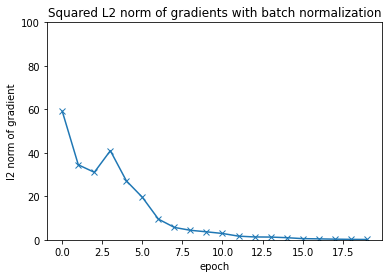

In [ ]:
def plot_l2_norm(l2_norm_list):
    plt.plot(l2_norm_list, '-x')
    plt.xlabel('epoch')
    plt.ylabel('l2 norm of gradient')
    plt.ylim(0, 100)
    plt.title('Squared L2 norm of gradients with batch normalization');

plot_l2_norm(history[-1])

In [ ]:
history_eval = []
history_eval.append(history[0])
for i in history[1][1:-1]:
    history_eval.append(i)

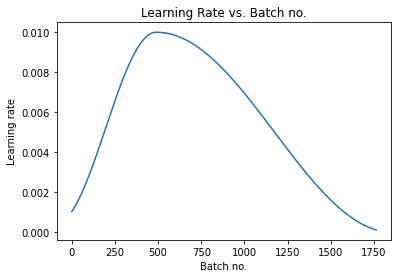

In [ ]:
def plot_lrs(history):
    lrs = np.concatenate([x.get('lrs', []) for x in history])
    plt.plot(lrs)
    plt.xlabel('Batch no.')
    plt.ylabel('Learning rate')
    plt.title('Learning Rate vs. Batch no.');

plot_lrs(history_eval)

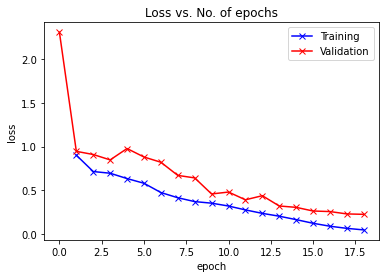

In [ ]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

plot_losses(history_eval)

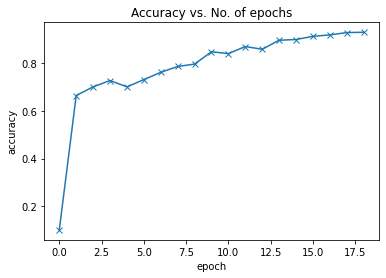

In [ ]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

plot_accuracies(history_eval)